In [1]:
import pandas as pd

from keras import regularizers, activations
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D

from Utils import *

np.random.seed(7)

2024-07-09 10:56:17.178304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 10:56:17.250872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 10:56:17.252730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 10:56:18.346232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## CNN model (Global Average Pooling)

#### Import data (ESC-10)

In [2]:
# import the .pkl file
df = pd.read_pickle("esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 156)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.8515761, 0.36829472, 0.39175928...",0,1,True


#### Define the initialization model function

In [3]:
def init_model():
    model = Sequential()
    
    #layer-1
    model.add(Conv2D(filters=24, kernel_size=5, input_shape=(mel_shape[0], mel_shape[1], 1),   # 128, 156 -> 124, 152
                      kernel_regularizer=regularizers.l2(1e-3), padding='valid'))
    model.add(ZeroPadding2D(padding=(1, 2)))  # 124, 152 -> 126, 156
    model.add(MaxPooling2D(pool_size=(3, 3), strides=3))  # 126, 156 -> 42, 52
    model.add(Activation(activations.relu))
    
    #layer-2
    model.add(Conv2D(filters=36, kernel_size=5, padding='valid', kernel_regularizer=regularizers.l2(1e-3))) # 42, 52 -> 38, 48
    model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # 38, 48 -> 19, 24
    model.add(Activation(activations.relu))
    
    #layer-3
    model.add(Conv2D(filters=48, kernel_size=3, padding='valid')) # 19, 24 -> 17, 22
    model.add(Activation(activations.relu))
    
    model.add(GlobalAveragePooling2D()) # 17, 22 -> 48
    
    #layer-4 (1st dense layer)
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(0.5))
    
    #layer-5 (2nd dense layer)
    model.add(Dense(10, activation='softmax'))

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [4]:
model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 152, 24)      624       
                                                                 
 zero_padding2d (ZeroPaddin  (None, 126, 156, 24)      0         
 g2D)                                                            
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 52, 24)        0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 42, 52, 24)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 48, 36)        21636     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 19, 24, 36)        0

#### Training and results

Fold 1/5

Pre-training accuracy: 7.500000298023224 %
Epoch 1/100


2024-07-09 10:56:22.584587: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102236160 exceeds 10% of free system memory.


40/40 [==============================] - 17s 396ms/step - loss: 2.2139 - accuracy: 0.1578 - val_loss: 1.9877 - val_accuracy: 0.2125
Epoch 2/100
40/40 [==============================] - 15s 381ms/step - loss: 2.0178 - accuracy: 0.2000 - val_loss: 1.7630 - val_accuracy: 0.4000
Epoch 3/100
40/40 [==============================] - 15s 379ms/step - loss: 1.9157 - accuracy: 0.2445 - val_loss: 1.6086 - val_accuracy: 0.4750
Epoch 4/100
40/40 [==============================] - 16s 397ms/step - loss: 1.8398 - accuracy: 0.3133 - val_loss: 1.4781 - val_accuracy: 0.5375
Epoch 5/100
40/40 [==============================] - 16s 400ms/step - loss: 1.7113 - accuracy: 0.3695 - val_loss: 1.3802 - val_accuracy: 0.5625
Epoch 6/100
40/40 [==============================] - 14s 344ms/step - loss: 1.5845 - accuracy: 0.4227 - val_loss: 1.2731 - val_accuracy: 0.5750
Epoch 7/100
40/40 [==============================] - 14s 340ms/step - loss: 1.4926 - accuracy: 0.4531 - val_loss: 1.1671 - val_accuracy: 0.5250
Epoc

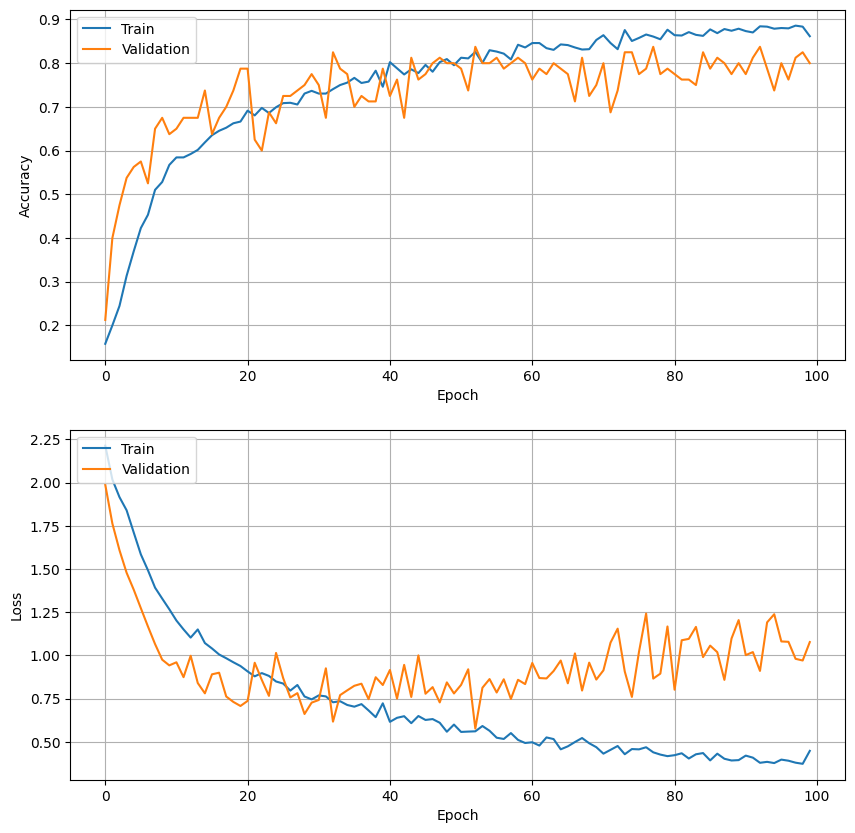

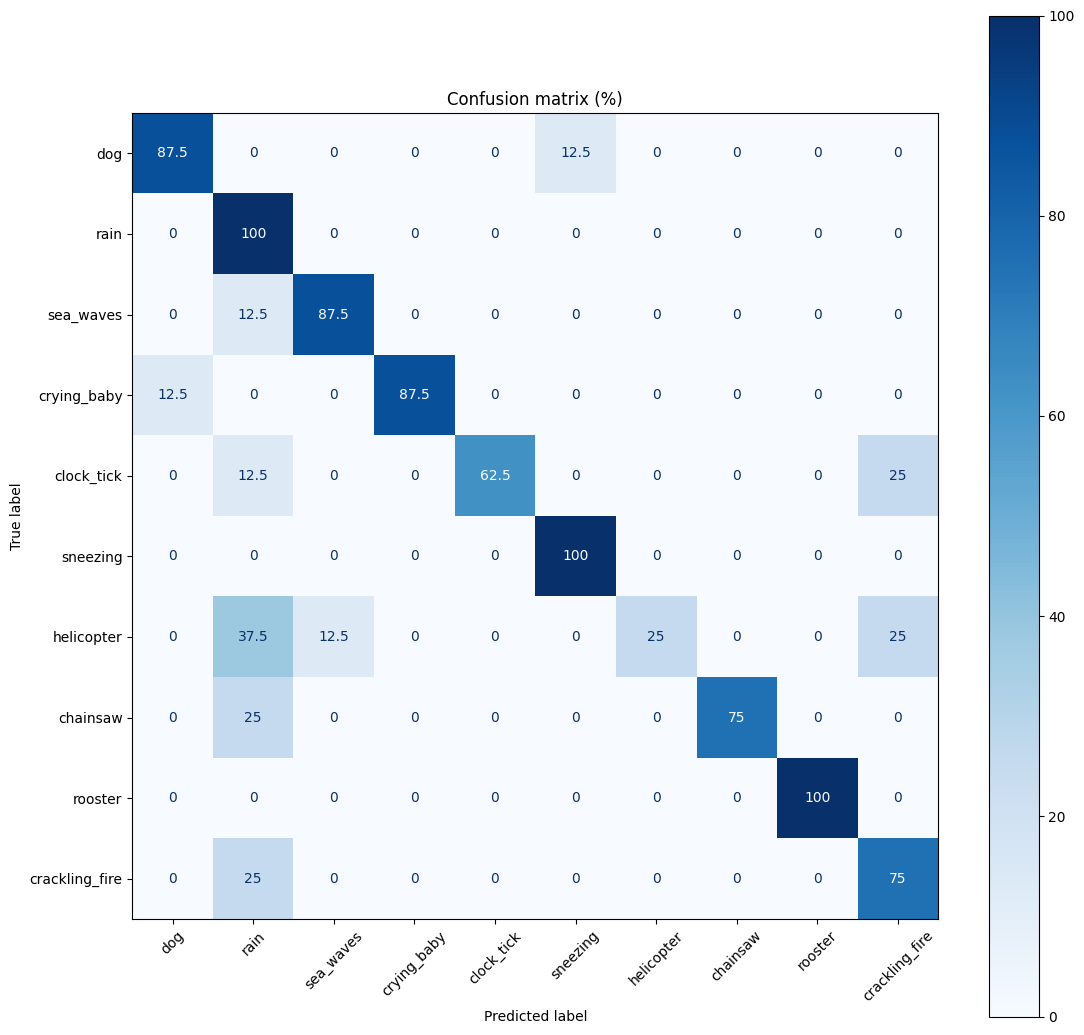

Fold 2/5

Pre-training accuracy: 8.749999850988388 %
Epoch 1/100


2024-07-09 11:21:45.236678: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102236160 exceeds 10% of free system memory.


40/40 [==============================] - 17s 380ms/step - loss: 2.1892 - accuracy: 0.1688 - val_loss: 1.9810 - val_accuracy: 0.3000
Epoch 2/100
40/40 [==============================] - 15s 384ms/step - loss: 2.0171 - accuracy: 0.2523 - val_loss: 1.8937 - val_accuracy: 0.3375
Epoch 3/100
40/40 [==============================] - 14s 358ms/step - loss: 1.9394 - accuracy: 0.2602 - val_loss: 1.7106 - val_accuracy: 0.4000
Epoch 4/100
40/40 [==============================] - 15s 367ms/step - loss: 1.8251 - accuracy: 0.3078 - val_loss: 1.6305 - val_accuracy: 0.3250
Epoch 5/100
40/40 [==============================] - 17s 436ms/step - loss: 1.7548 - accuracy: 0.3508 - val_loss: 1.5572 - val_accuracy: 0.4750
Epoch 6/100
40/40 [==============================] - 16s 392ms/step - loss: 1.6548 - accuracy: 0.3961 - val_loss: 1.4009 - val_accuracy: 0.4625
Epoch 7/100
40/40 [==============================] - 18s 455ms/step - loss: 1.5499 - accuracy: 0.4172 - val_loss: 1.2917 - val_accuracy: 0.5625
Epoc

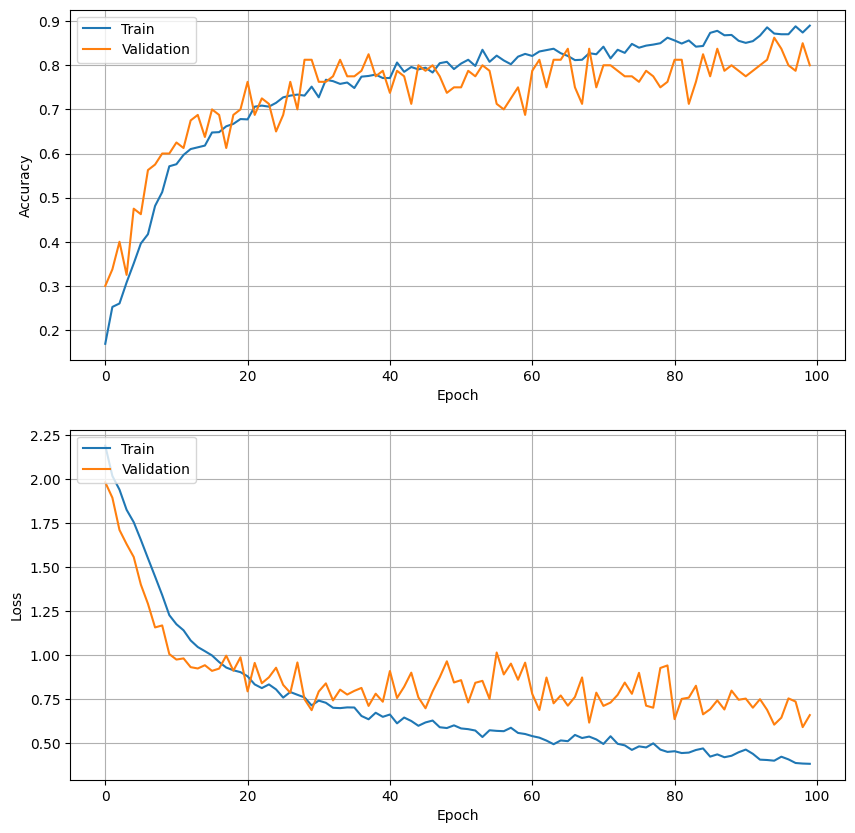

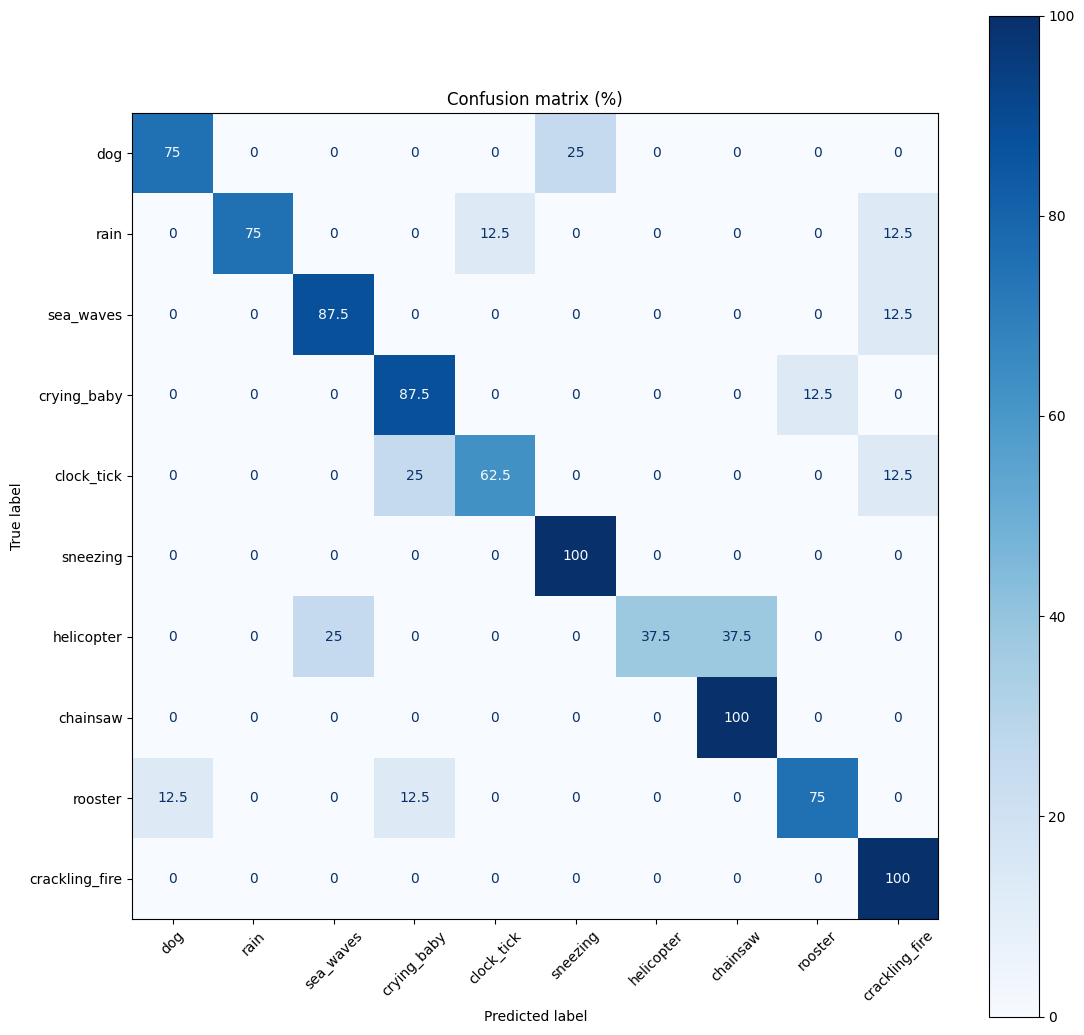

Fold 3/5

Pre-training accuracy: 15.000000596046448 %
Epoch 1/100


2024-07-09 11:48:10.433111: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102236160 exceeds 10% of free system memory.


40/40 [==============================] - 17s 390ms/step - loss: 2.1958 - accuracy: 0.1633 - val_loss: 2.0088 - val_accuracy: 0.2625
Epoch 2/100
40/40 [==============================] - 16s 396ms/step - loss: 1.9849 - accuracy: 0.2430 - val_loss: 1.8746 - val_accuracy: 0.3000
Epoch 3/100
40/40 [==============================] - 15s 373ms/step - loss: 1.8668 - accuracy: 0.2984 - val_loss: 1.7220 - val_accuracy: 0.3875
Epoch 4/100
40/40 [==============================] - 15s 374ms/step - loss: 1.7760 - accuracy: 0.3133 - val_loss: 1.6385 - val_accuracy: 0.4625
Epoch 5/100
40/40 [==============================] - 15s 369ms/step - loss: 1.6777 - accuracy: 0.3422 - val_loss: 1.5477 - val_accuracy: 0.3750
Epoch 6/100
40/40 [==============================] - 15s 380ms/step - loss: 1.5570 - accuracy: 0.4023 - val_loss: 1.3987 - val_accuracy: 0.5250
Epoch 7/100
40/40 [==============================] - 13s 315ms/step - loss: 1.4299 - accuracy: 0.4625 - val_loss: 1.3556 - val_accuracy: 0.5125
Epoc

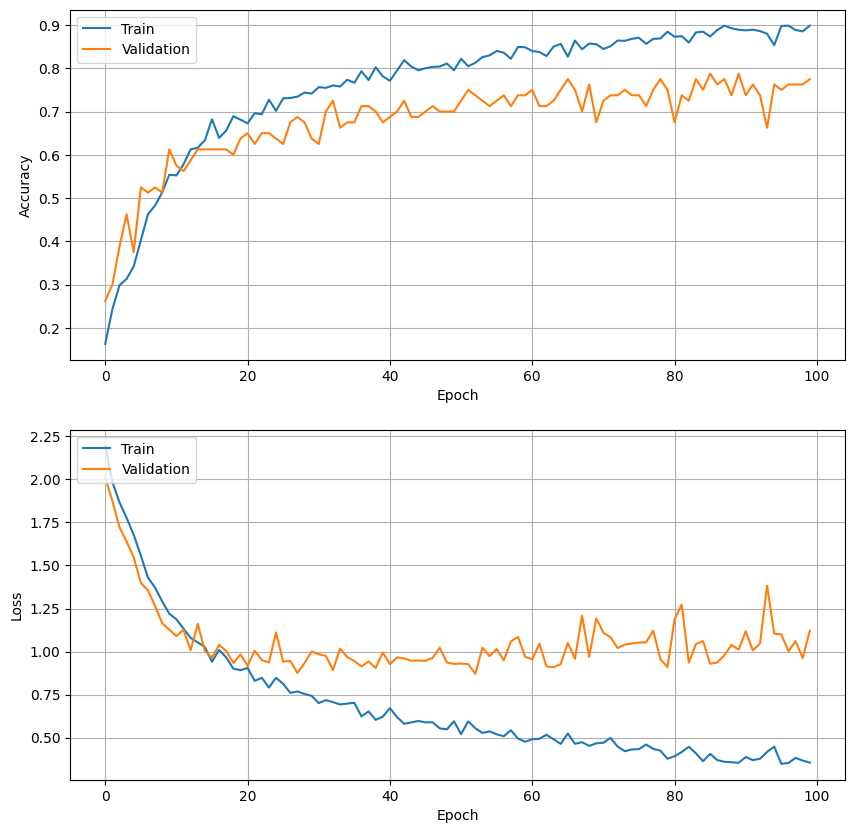

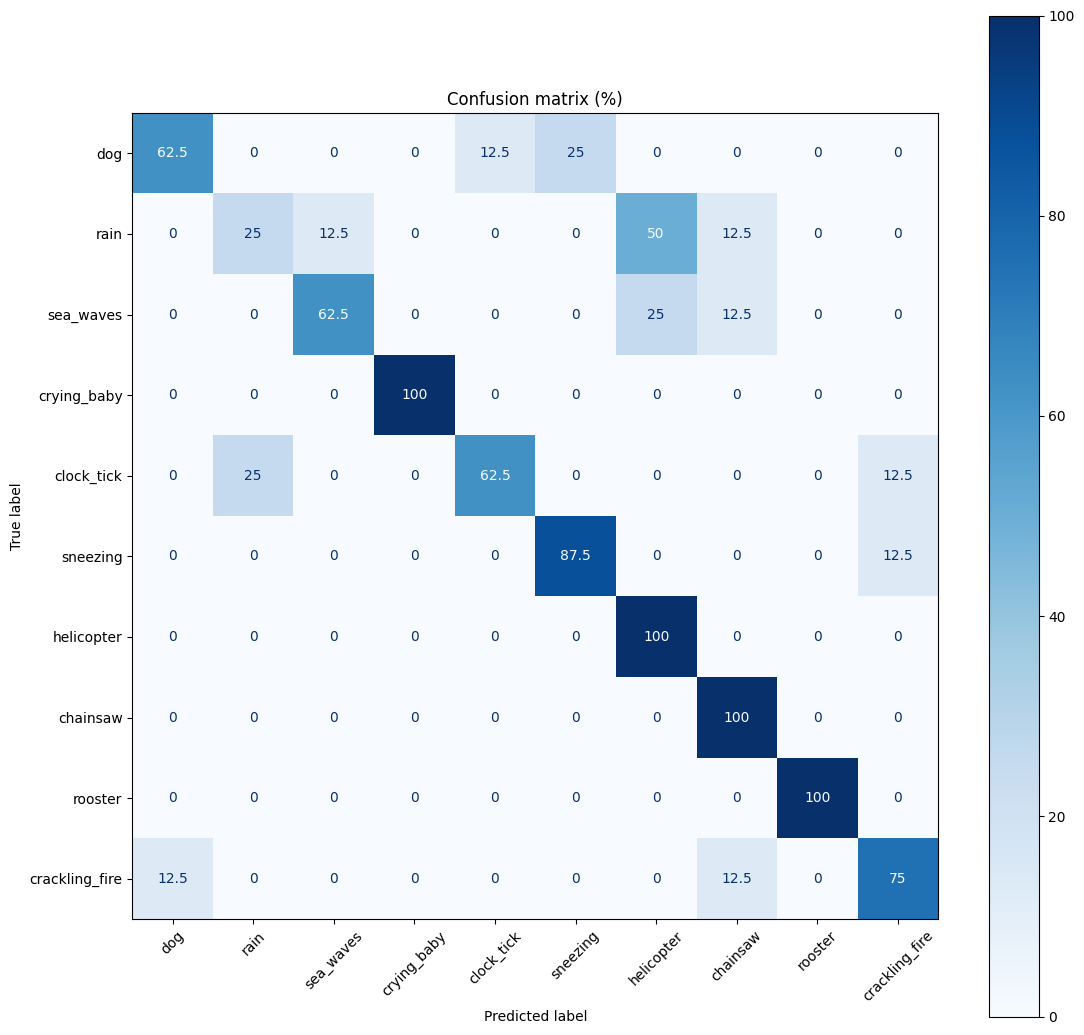

Fold 4/5

Pre-training accuracy: 15.000000596046448 %
Epoch 1/100


2024-07-09 12:10:34.698153: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102236160 exceeds 10% of free system memory.


40/40 [==============================] - 13s 308ms/step - loss: 2.1918 - accuracy: 0.1859 - val_loss: 1.9723 - val_accuracy: 0.1875
Epoch 2/100
40/40 [==============================] - 12s 308ms/step - loss: 1.9770 - accuracy: 0.2289 - val_loss: 1.7798 - val_accuracy: 0.3750
Epoch 3/100
40/40 [==============================] - 13s 331ms/step - loss: 1.8768 - accuracy: 0.2711 - val_loss: 1.7443 - val_accuracy: 0.3625
Epoch 4/100
40/40 [==============================] - 13s 329ms/step - loss: 1.7981 - accuracy: 0.3078 - val_loss: 1.6455 - val_accuracy: 0.4125
Epoch 5/100
40/40 [==============================] - 13s 327ms/step - loss: 1.6947 - accuracy: 0.3430 - val_loss: 1.5576 - val_accuracy: 0.4625
Epoch 6/100
40/40 [==============================] - 13s 335ms/step - loss: 1.6161 - accuracy: 0.3828 - val_loss: 1.4021 - val_accuracy: 0.5000
Epoch 7/100
40/40 [==============================] - 14s 339ms/step - loss: 1.5091 - accuracy: 0.4398 - val_loss: 1.3996 - val_accuracy: 0.4625
Epoc

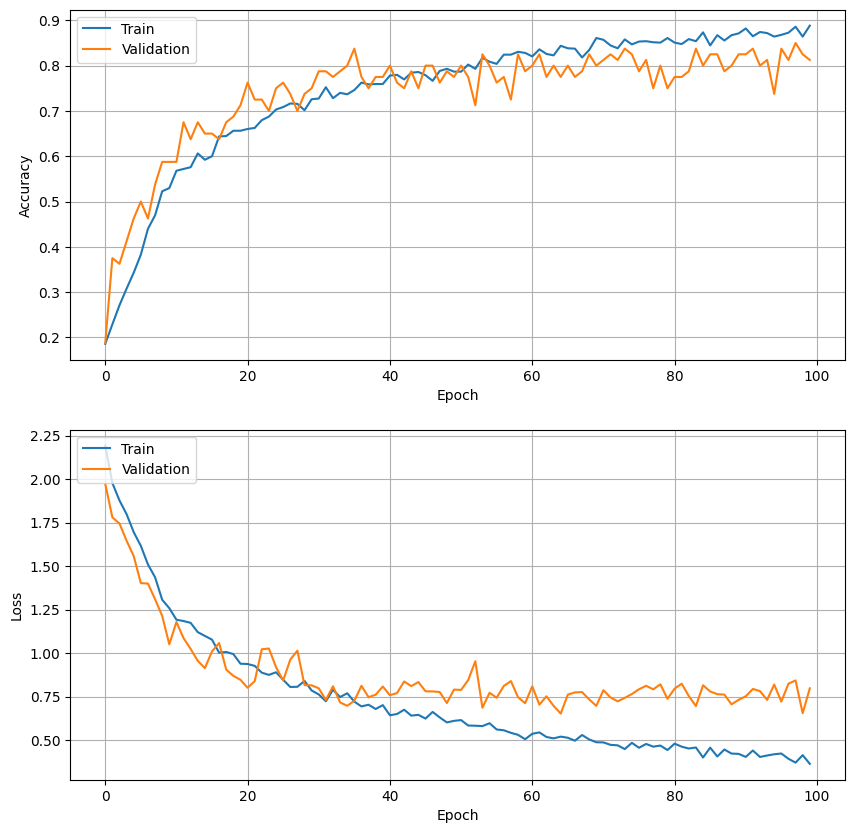

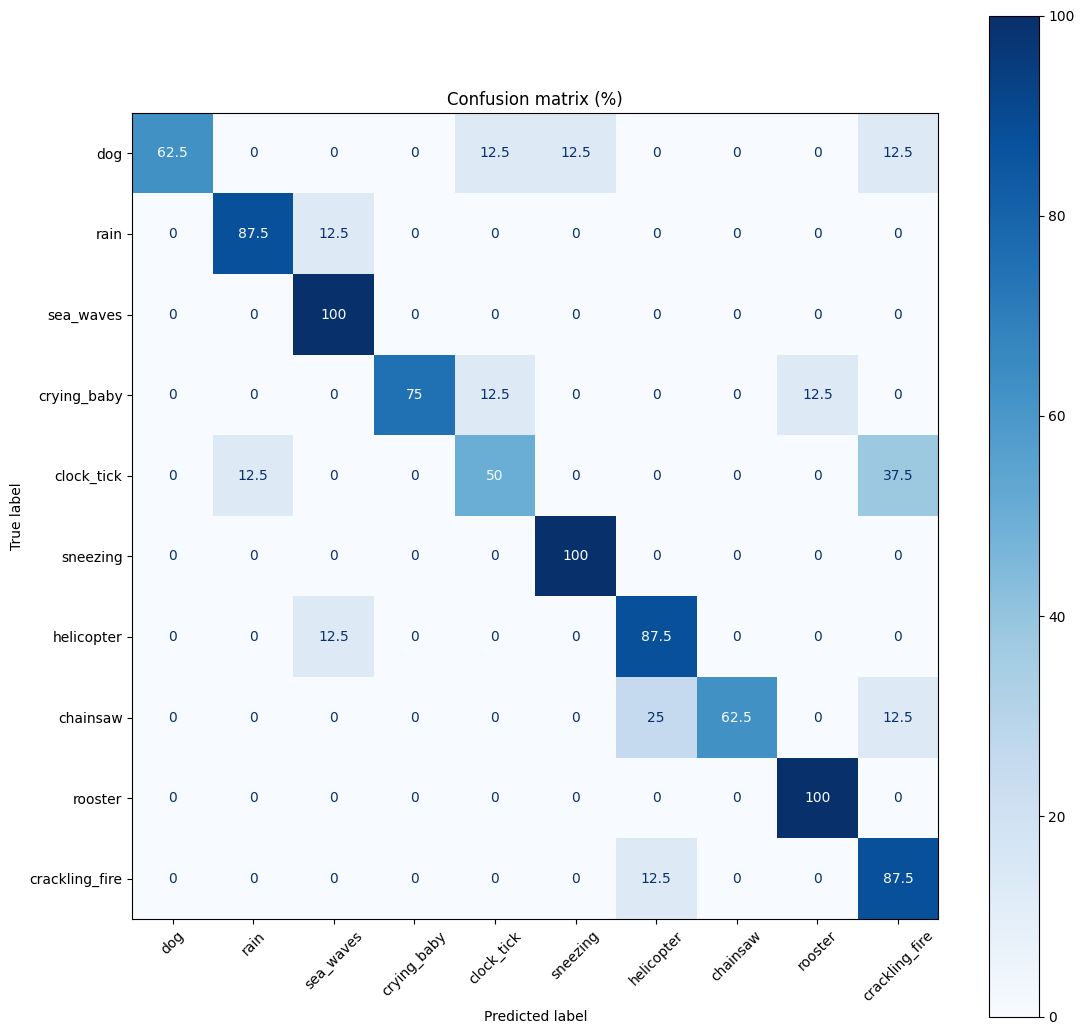

Fold 5/5

Pre-training accuracy: 10.000000149011612 %
Epoch 1/100


2024-07-09 12:32:04.724912: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102236160 exceeds 10% of free system memory.


40/40 [==============================] - 13s 312ms/step - loss: 2.1831 - accuracy: 0.1945 - val_loss: 1.9888 - val_accuracy: 0.3125
Epoch 2/100
40/40 [==============================] - 14s 341ms/step - loss: 1.9510 - accuracy: 0.2516 - val_loss: 1.8647 - val_accuracy: 0.3125
Epoch 3/100
40/40 [==============================] - 12s 311ms/step - loss: 1.8715 - accuracy: 0.2758 - val_loss: 1.7872 - val_accuracy: 0.3500
Epoch 4/100
40/40 [==============================] - 13s 311ms/step - loss: 1.7872 - accuracy: 0.3328 - val_loss: 1.7570 - val_accuracy: 0.3250
Epoch 5/100
40/40 [==============================] - 12s 305ms/step - loss: 1.7053 - accuracy: 0.3313 - val_loss: 1.6539 - val_accuracy: 0.4500
Epoch 6/100
40/40 [==============================] - 12s 301ms/step - loss: 1.6369 - accuracy: 0.3859 - val_loss: 1.5630 - val_accuracy: 0.5500
Epoch 7/100
40/40 [==============================] - 12s 291ms/step - loss: 1.5598 - accuracy: 0.3914 - val_loss: 1.4798 - val_accuracy: 0.5500
Epoc

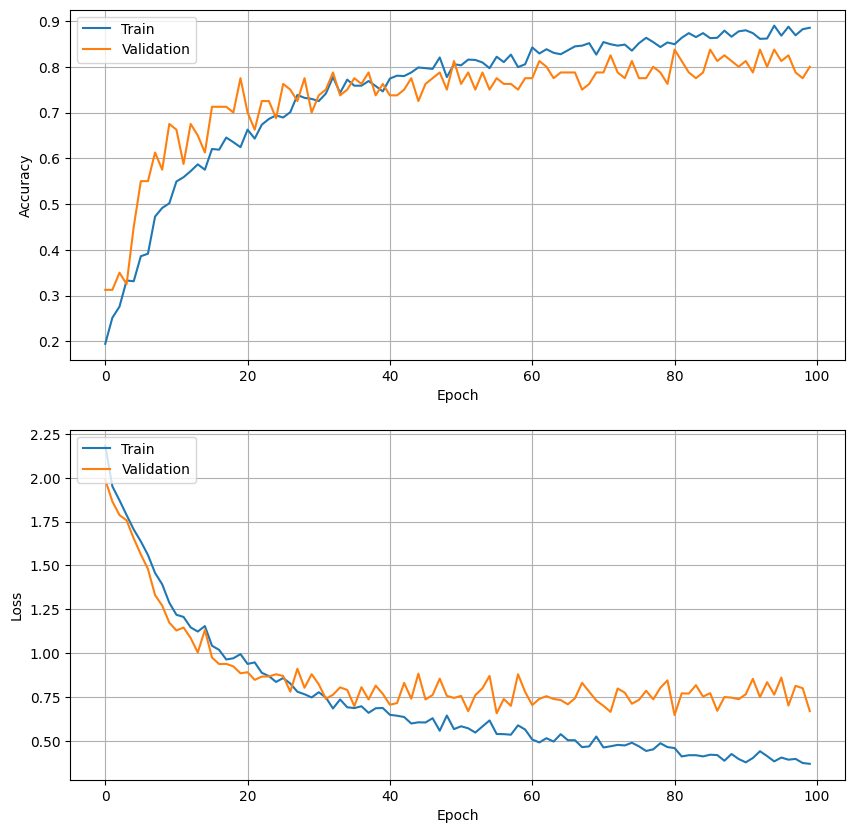

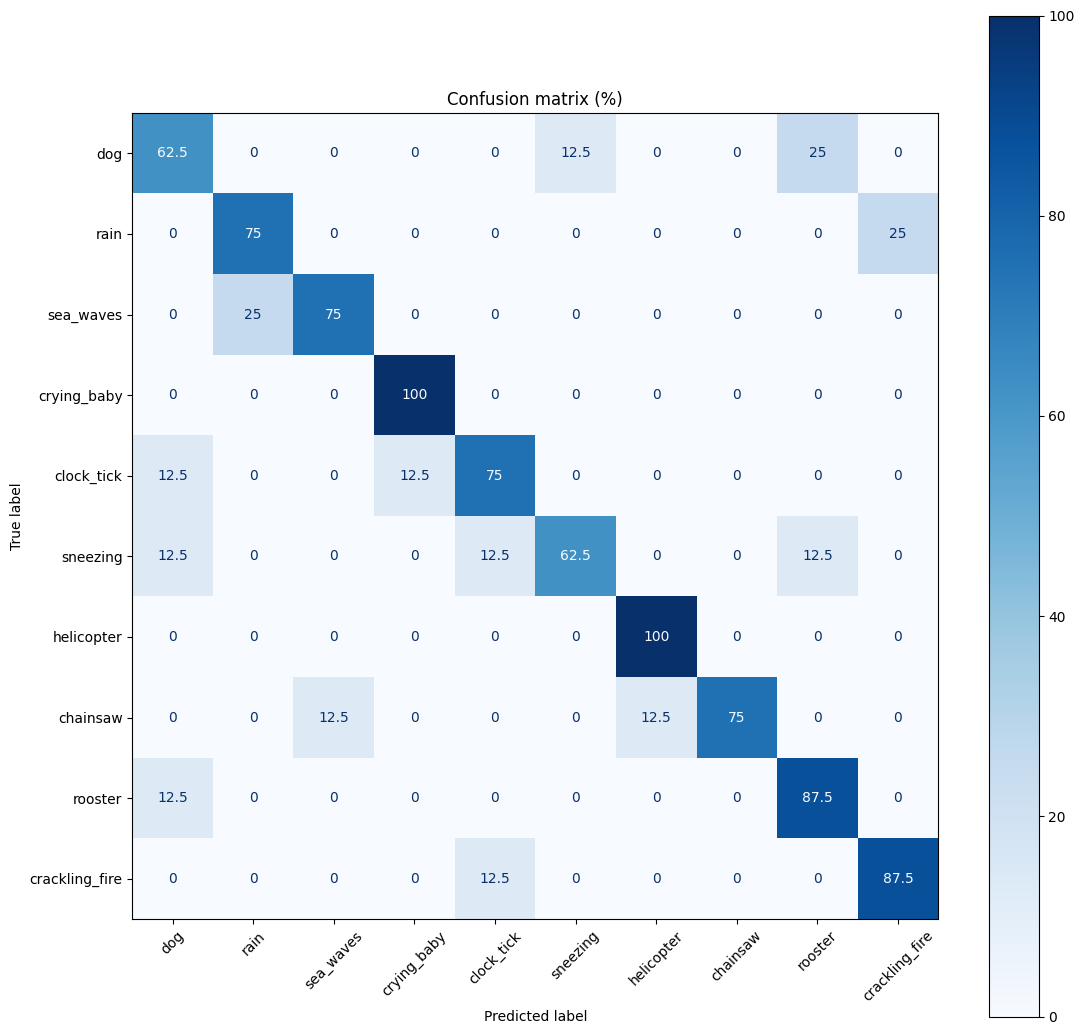

Average results:

Classification training results:
Average training accuracy: 0.88 ± 0.01
Average validation accuracy: 0.80 ± 0.01
Average training loss: 0.38 ± 0.03
Average validation loss: 0.87 ± 0.20

Average (total) training time: 1405.63 ± 122.05 s

Plotting average results:

Classification training result plots:


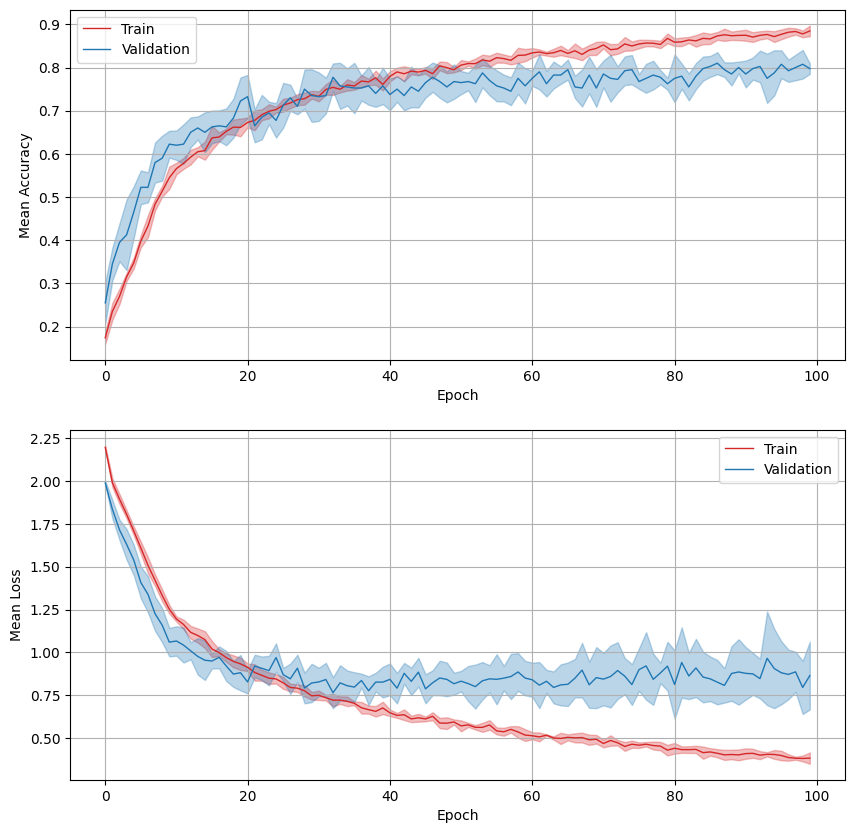

Average confusion matrix:



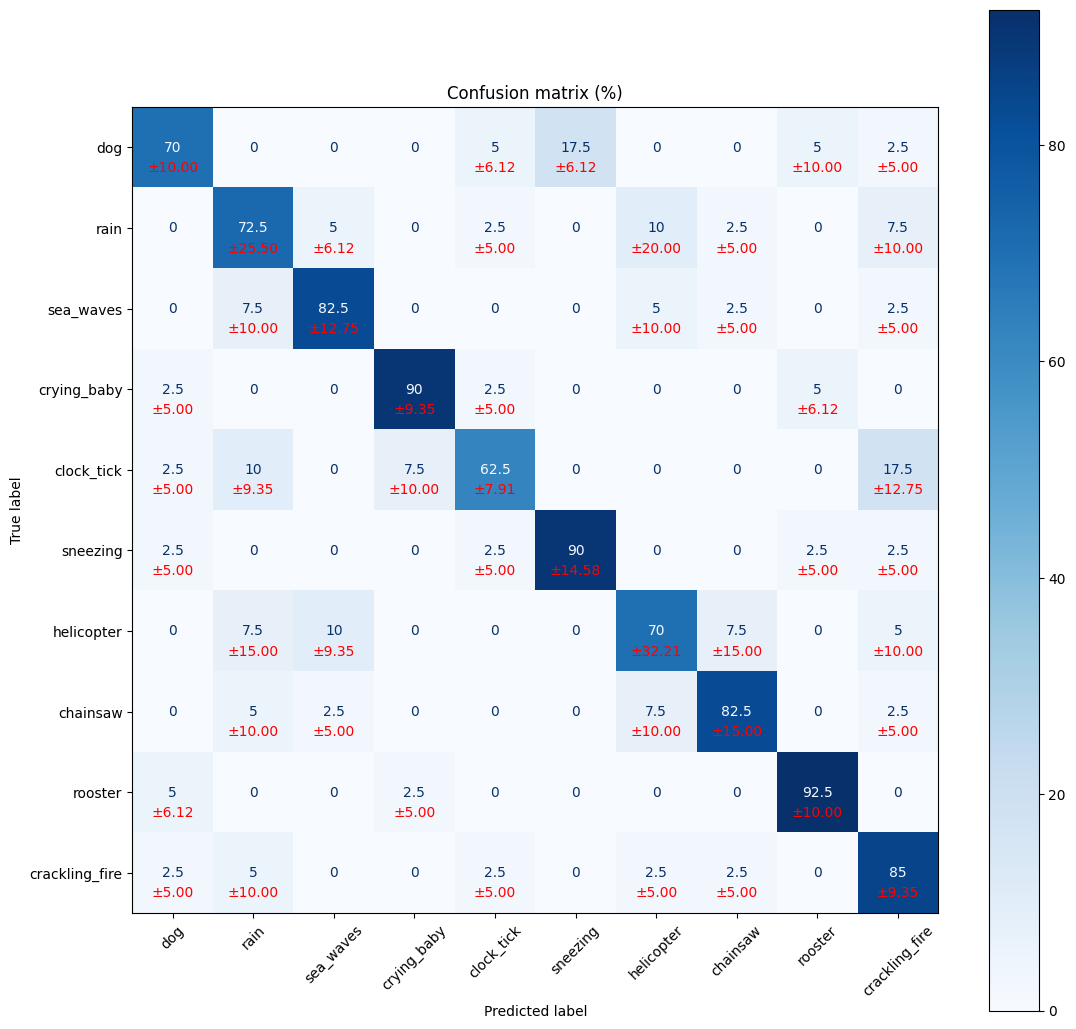

In [5]:
x_dim = (mel_shape[0], mel_shape[1], 1)
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=100, num_batch_size=32, verbose=1)